#📌 Extracão

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [ ]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])


account_charges_df = account_df[['Charges.Monthly', 'Charges.Total', 'Contract', 'PaperlessBilling', 'PaymentMethod']]


df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_charges_df], axis=1)

display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Charges.Monthly,Charges.Total,Contract,PaperlessBilling,PaymentMethod
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,65.6,593.3,One year,Yes,Mailed check
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,59.9,542.4,Month-to-month,No,Mailed check
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,73.9,280.85,Month-to-month,Yes,Electronic check
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,98.0,1237.85,Month-to-month,Yes,Electronic check
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,83.9,267.4,Month-to-month,Yes,Mailed check


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Charges.Monthly   7267 non-null   float64


In [ ]:
# Exibir valores únicos e contagem de valores para algumas colunas categóricas
categorical_cols_to_explore = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_cols_to_explore:
    print(f"Coluna: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Coluna: Churn
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
------------------------------
Coluna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64
------------------------------
Coluna: SeniorCitizen
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
------------------------------
Coluna: Partner
Partner
No     3749
Yes    3518
Name: count, dtype: int64
------------------------------
Coluna: Dependents
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
------------------------------
Coluna: Contract
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64
------------------------------
Coluna: InternetService
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
------------------------------
Coluna: PaperlessBilling
PaperlessBilling
Yes    4311
No     2956
Name: count, dtype: int64
------------------------------
Coluna: PaymentMe

Nota-se 224 valores ' ' em churn. A seguir será reaizado o tratamento de dados

## Limpeza e transformação de dados


Tratar os valores vazios na coluna `Churn` e converter a coluna `Charges.Total` para tipo numérico, tratando possíveis erros.


In [ ]:
df = df[df['Churn'].str.strip() != '']
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.dropna(subset=['Charges.Total'], inplace=True)
display(df.info())
display(df['Charges.Total'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Charges.Monthly   7032 non-null   float64
 17  

None

array([ 593.3 ,  542.4 ,  280.85, ...,  742.9 , 4627.65, 3707.6 ])

In [ ]:
df['Contas_Diarias'] = df['Charges.Monthly'] / 30
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Charges.Monthly,Charges.Total,Contract,PaperlessBilling,PaymentMethod,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,65.6,593.30,One year,Yes,Mailed check,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,59.9,542.40,Month-to-month,No,Mailed check,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,73.9,280.85,Month-to-month,Yes,Electronic check,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,98.0,1237.85,Month-to-month,Yes,Electronic check,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,83.9,267.40,Month-to-month,Yes,Mailed check,2.796667


## Conversão de variáveis categóricas

Converter as variáveis categóricas relevantes para um formato numérico (usando técnicas como One-Hot Encoding, por exemplo) para que a correlação possa ser calculada.


In [ ]:
base = df.copy()

In [ ]:

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')


binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multi_cat_cols = [col for col in categorical_cols if df[col].nunique() > 2]


for col in binary_cols:

    unique_values = df[col].unique()
    if 'No' in unique_values and 'Yes' in unique_values:
        df[col] = df[col].map({'No': 0, 'Yes': 1})

    elif 'No internet service' in unique_values and 'Yes' in unique_values:
         df[col] = df[col].map({'No internet service': 0, 'Yes': 1})
    elif 'No phone service' in unique_values and 'Yes' in unique_values:
         df[col] = df[col].map({'No phone service': 0, 'Yes': 1})



df = pd.get_dummies(df, columns=multi_cat_cols, dtype=int)

display(df.head())
display(df.info())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Charges.Monthly,Charges.Total,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,Female,0,1,1,9,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,0,Male,0,0,0,9,1,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,0004-TLHLJ,1,Male,0,0,0,4,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,0011-IGKFF,1,Male,1,1,0,13,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,0013-EXCHZ,1,Female,1,1,0,3,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   Churn                                    7032 non-null   int64  
 2   gender                                   7032 non-null   object 
 3   SeniorCitizen                            7032 non-null   int64  
 4   Partner                                  7032 non-null   int64  
 5   Dependents                               7032 non-null   int64  
 6   tenure                                   7032 non-null   int64  
 7   PhoneService                             7032 non-null   int64  
 8   Charges.Monthly                          7032 non-null   float64
 9   Charges.Total                            7032 non-null   float64
 10  PaperlessBilling                         7032 non-nul

None

#📊 Carga e análise

In [ ]:
display(df.describe())

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Charges.Monthly,Charges.Total,PaperlessBilling,Contas_Diarias,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,64.798208,2283.300441,0.592719,2.159940,...,0.395478,0.216155,0.388367,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,30.085974,2266.771362,0.491363,1.002866,...,0.488988,0.411650,0.487414,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.000000,0.608333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.587500,401.450000,0.000000,1.186250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,1.000000,2.345000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,1.000000,2.995417,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,3.958333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Cálculo de correlação


Calcular a correlação entre as variáveis numéricas e a variável `Churn` (já convertida para numérica).


In [ ]:

correlation_matrix = df.corr(numeric_only=True)


churn_correlation = correlation_matrix['Churn']


sorted_churn_correlation = churn_correlation.abs().sort_values(ascending=False)


sorted_churn_correlation = sorted_churn_correlation.drop('Churn')


print("Correlação com a variável 'Churn' (ordenado por valor absoluto):")
display(sorted_churn_correlation)

Correlação com a variável 'Churn' (ordenado por valor absoluto):


,Churn
Contract_Month-to-month,0.404565
tenure,0.354049
OnlineSecurity_No,0.342235
TechSupport_No,0.336877
InternetService_Fiber optic,0.307463
Contract_Two year,0.301552
PaymentMethod_Electronic check,0.301455
OnlineBackup_No,0.267595
DeviceProtection_No,0.252056
OnlineSecurity_No internet service,0.227578


## Visualização da correlação


Exibir a matriz de correlação ou um mapa de calor para visualizar as relações.


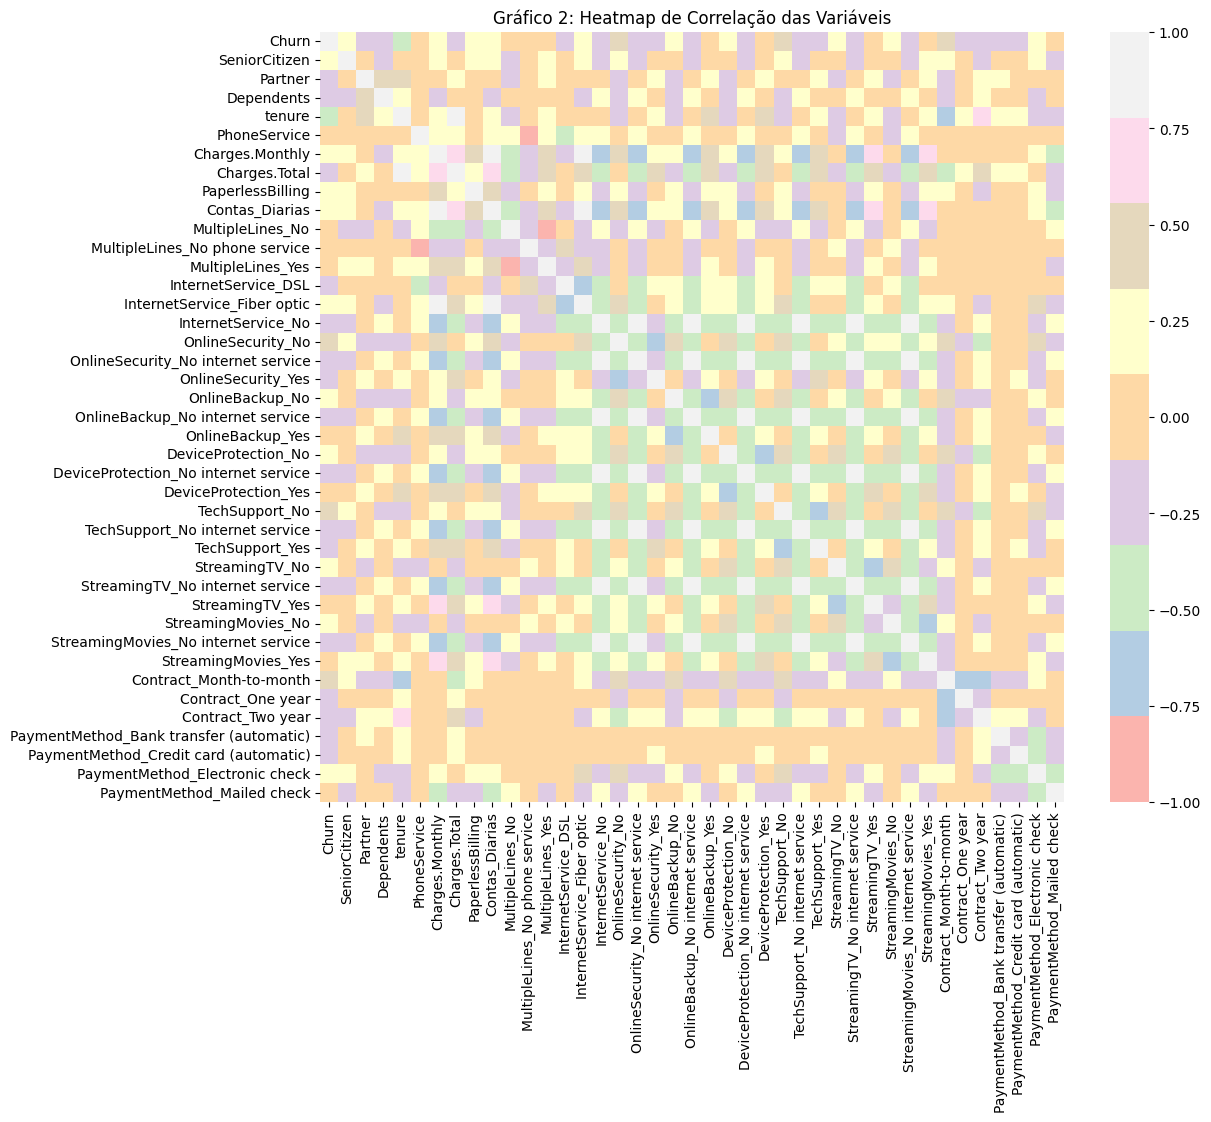

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='Pastel1', annot=False)
plt.title("Gráfico 2: Heatmap de Correlação das Variáveis")
plt.show()

/tmp/ipython-input-103-3230369692.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=pastel_palette)
/tmp/ipython-input-103-3230369692.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Churn', palette=pastel_palette)


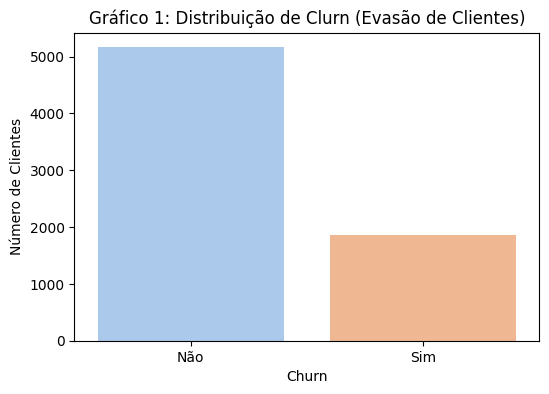

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='Churn', palette=pastel_palette)
plt.title('Gráfico 1: Distribuição de Clurn (Evasão de Clientes)')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

/tmp/ipython-input-107-1827326995.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)


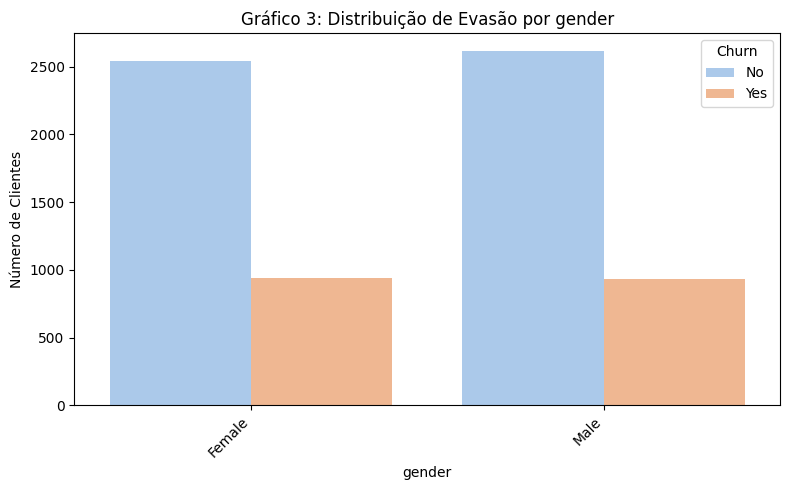

/tmp/ipython-input-107-1827326995.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)


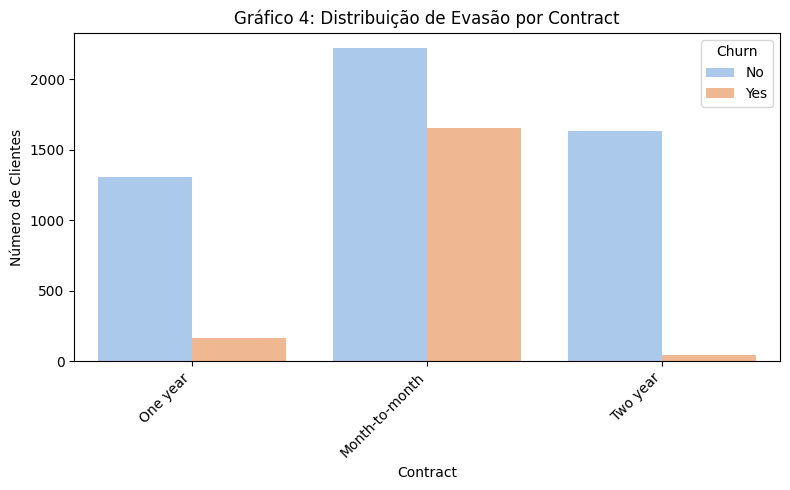

/tmp/ipython-input-107-1827326995.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)


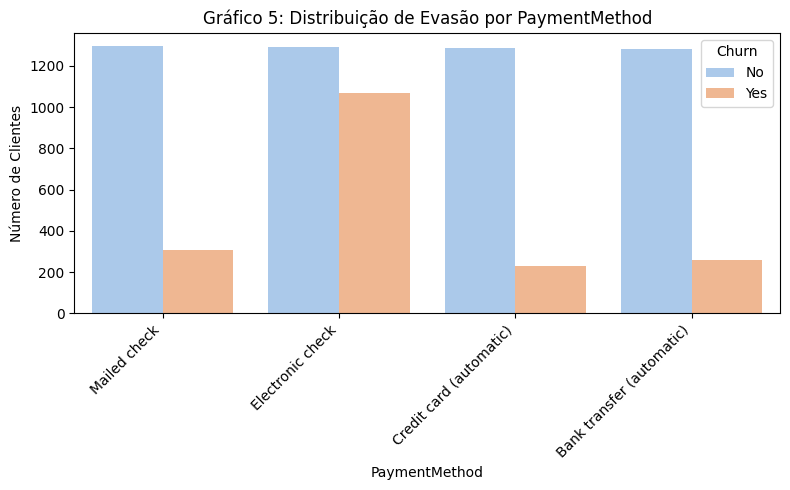

/tmp/ipython-input-107-1827326995.py:15: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)


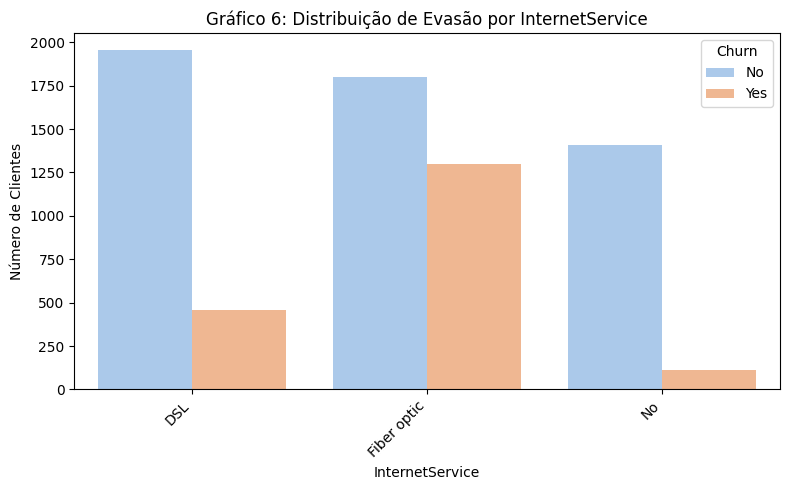

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


categorical_cols_for_churn_analysis = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

pastel_palette = sns.color_palette("pastel")



graph_number = 3
for col in categorical_cols_for_churn_analysis:
    plt.figure(figsize=(8, 5))

    sns.countplot(data=base, x=col, hue='Churn', palette=pastel_palette)
    plt.title(f'Gráfico {graph_number}: Distribuição de Evasão por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    graph_number += 1

/tmp/ipython-input-106-1699123889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
/tmp/ipython-input-106-1699123889.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)


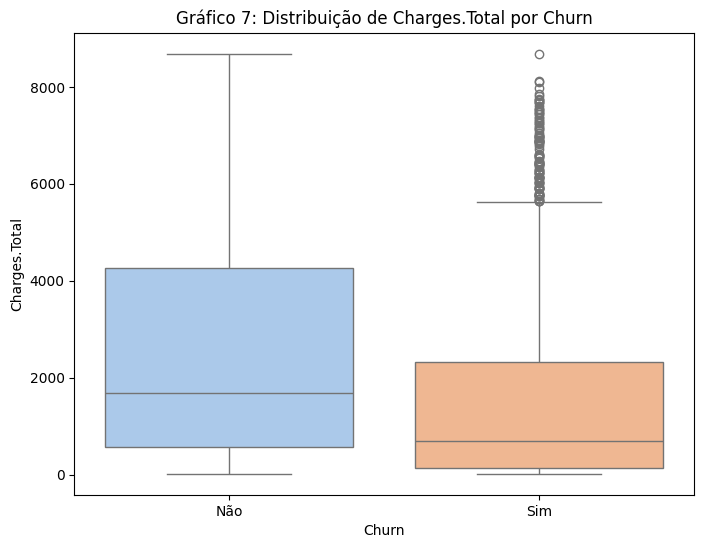

/tmp/ipython-input-106-1699123889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
/tmp/ipython-input-106-1699123889.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)


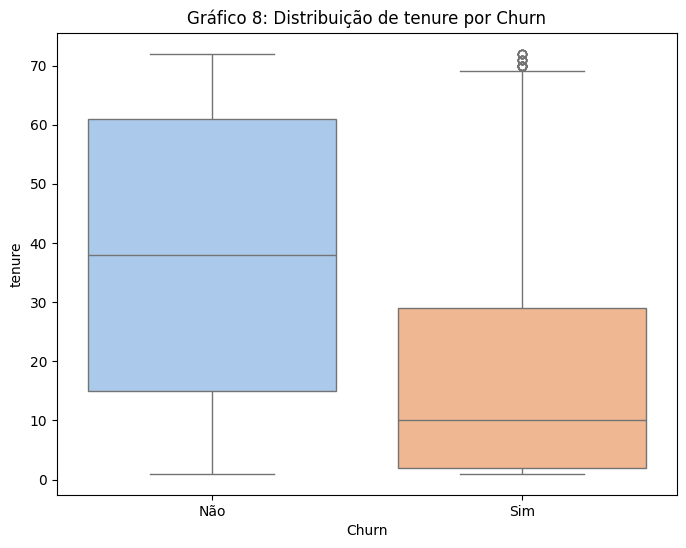

/tmp/ipython-input-106-1699123889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
/tmp/ipython-input-106-1699123889.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)


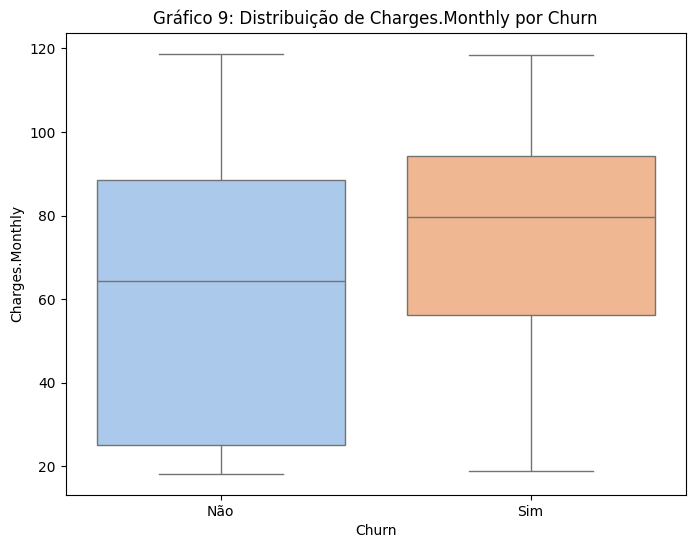

/tmp/ipython-input-106-1699123889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
/tmp/ipython-input-106-1699123889.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)


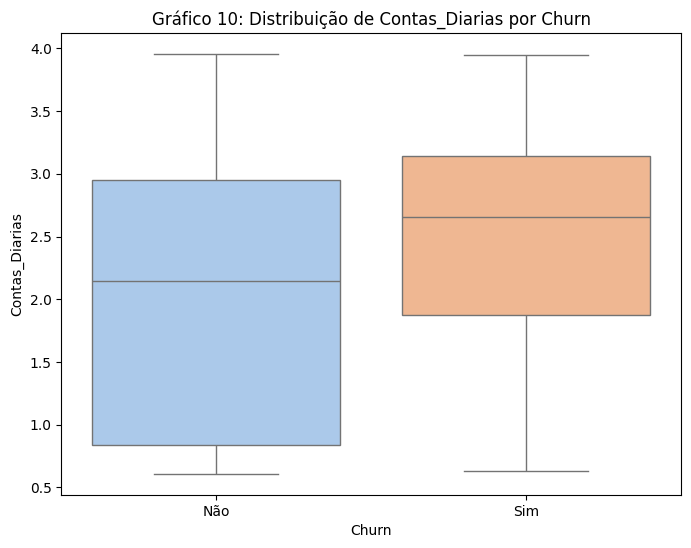

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_to_compare = ['Charges.Total', 'tenure', 'Charges.Monthly', 'Contas_Diarias']


pastel_palette = sns.color_palette("pastel")


graph_number = 7
for col in numerical_cols_to_compare:
    plt.figure(figsize=(8, 6))

    sns.boxplot(data=df, x='Churn', y=col, palette=pastel_palette)
    plt.title(f'Gráfico {graph_number}: Distribuição de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.xticks([0, 1], ['Não', 'Sim'])
    plt.show()
    graph_number += 1

#📄Relatorio Final

## Introdução

Este relatório apresenta uma análise exploratória do conjunto de dados de clientes da TelecomX com o objetivo de entender o fenômeno da evasão de clientes (Churn). A evasão representa um desafio significativo para empresas de telecomunicações, impactando diretamente a receita e o crescimento. Identificar os fatores que levam os clientes a cancelar seus serviços é crucial para desenvolver estratégias de retenção eficazes.

## Limpeza e Tratamento de Dados

Os dados foram carregados a partir de um arquivo JSON. Durante a fase de limpeza e tratamento, foram realizados os seguintes passos:

*   **Normalização de Dados:** As informações aninhadas nas colunas 'customer', 'phone', 'internet' e 'account' foram extraídas e expandidas em colunas separadas para facilitar a análise.
*   **Tratamento de Valores Vazios na Coluna 'Churn':** Identificamos 224 valores vazios na coluna 'Churn', que foram removidos do conjunto de dados para garantir a integridade da análise da variável resposta.
*   **Conversão de Tipo de Dados:** A coluna 'Charges.Total', inicialmente identificada como tipo 'object', foi convertida para um tipo numérico (`float64`). Valores não numéricos que causaram erros na conversão foram tratados, resultando na remoção de algumas linhas com dados inconsistentes nesta coluna.
*   **Criação da Coluna 'Contas_Diarias':** Uma nova coluna, 'Contas_Diarias', foi criada dividindo o 'Charges.Monthly' por 30 para obter uma estimativa do custo diário dos serviços, proporcionando uma granularidade maior na análise de custos.
*   **Conversão de Variáveis Categóricas:** Variáveis categóricas foram convertidas para um formato numérico (utilizando One-Hot Encoding para variáveis com mais de duas categorias e mapeamento para variáveis binárias) para permitir o cálculo de correlações e preparativos para possíveis modelagens futuras.

## Análise Exploratória de Dados

A análise exploratória de dados (EDA) foi realizada para entender a distribuição das variáveis e suas relações com a evasão.

*   **Distribuição de Churn:** A análise da distribuição da variável Churn (visualizada no **Gráfico 1: Distribuição de Clientes por Evasão**) mostrou a proporção de clientes que evadiram ('Sim') versus os que permaneceram ('Não'). Isso nos deu uma linha de base sobre a magnitude do problema de evasão no conjunto de dados.

*   **Correlação com a Variável Churn:** Calculamos a correlação entre as variáveis numéricas (incluindo as resultantes do One-Hot Encoding) e a variável Churn (convertida para 0 e 1). A visualização da matriz de correlação (**Gráfico 2: Heatmap de Correlação das Variáveis**) e a lista de correlações ordenadas por valor absoluto destacaram as variáveis com maior associação à evasão.
    *   As variáveis com maior correlação positiva com a evasão (`Churn`) incluem: **Contract\_Month-to-month** (clientes com contrato mensal), **InternetService\_Fiber optic** (clientes com serviço de internet de fibra óptica), **PaymentMethod\_Electronic check** (clientes que pagam com cheque eletrônico), **OnlineSecurity\_No**, **TechSupport\_No**, **OnlineBackup\_No**, e **DeviceProtection\_No** (clientes que não assinam serviços de segurança online, suporte técnico, backup online e proteção de dispositivo, respectivamente).
    *   As variáveis com maior correlação negativa (ou seja, associadas à *não* evasão) incluem: **tenure** (tempo de contrato - clientes com mais tempo de contrato), **Contract\_Two year** (clientes com contrato de dois anos), **Contract\_One year** (clientes com contrato de um ano), e serviços adicionais com "Yes" (embora com menor magnitude de correlação que os "No").
    *   **Charges.Monthly** e **Contas\_Diarias** mostram uma correlação positiva moderada com Churn.

*   **Distribuição de Churn por Variáveis Categóricas:** Gráficos de contagem foram gerados para visualizar a distribuição de Churn em relação a variáveis categóricas importantes como Gênero, Tipo de Contrato, Método de Pagamento e Serviço de Internet (**Gráfico 3: Distribuição de Evasão por Variáveis Categóricas**). Essa análise permitiu observar padrões de evasão dentro de cada categoria.
    *   **Gênero:** A análise não mostrou uma diferença significativa na taxa de evasão entre clientes do gênero masculino e feminino.
    *   **Tipo de Contrato:** Clientes com contratos **Month-to-month** apresentam uma taxa de evasão consideravelmente maior em comparação com clientes com contratos de um ou dois anos.
    *   **Método de Pagamento:** O método de pagamento **Electronic check** está associado a uma proporção maior de evasão em comparação com outros métodos.
    *   **Serviço de Internet:** Clientes com serviço de internet **Fiber optic** parecem ter uma taxa de evasão maior do que aqueles com DSL ou sem serviço de internet.

*   **Distribuição de Variáveis Numéricas por Churn:** Box plots foram utilizados para comparar a distribuição de variáveis numéricas como 'Charges.Total', 'tenure', 'Charges.Monthly' e 'Contas_Diarias' entre os clientes que evadiram e os que não evadiram (**Gráfico 4: Distribuição de Variáveis Numéricas por Churn**).
    *   **tenure:** Clientes que evadiram tendem a ter um **tempo de contrato (tenure) significativamente menor** do que os clientes que permaneceram.
    *   **Charges.Monthly** e **Contas\_Diarias:** Clientes que evadiram tendem a ter **cobranças mensais e diárias mais altas** em média do que os clientes que não evadem.
    *   **Charges.Total:** Clientes que evadiram tendem a ter um **total gasto (Charges.Total) menor** do que os clientes que não evadiram, o que faz sentido, pois eles tiveram um tempo de contrato menor.

## Conclusões e Insights

Com base na análise realizada, os seguintes insights foram identificados:

*   Os **clientes com maior probabilidade de evadir** são aqueles com **contratos mensais**, que utilizam **serviço de internet de fibra óptica**, pagam com **cheque eletrônico** e **não assinam serviços adicionais de segurança, backup, proteção de dispositivo ou suporte técnico**.
*   O **tempo de contrato** é um dos preditores mais fortes de não evasão: clientes com **maior tenure** têm menor probabilidade de evadir.
*   Embora clientes que evadem tenham **cobranças mensais e diárias mais altas**, o **total gasto** é menor devido ao menor tempo de contrato.
*   A falta de serviços adicionais de segurança e suporte técnico está fortemente associada à evasão, sugerindo que estes serviços podem aumentar a satisfação e retenção do cliente.
*   O método de pagamento por cheque eletrônico pode estar associado a um processo menos estável ou a clientes menos engajados com a empresa.

Esses insights sugerem que a evasão pode estar relacionada a uma combinação de **factores de custo (cobranças mensais mais altas), tipo de serviço (fibra óptica), falta de engajamento com serviços de valor agregado (segurança, suporte) e a flexibilidade de contratos mensais**, que facilitam a saída. A insatisfação com a qualidade do serviço de fibra óptica ou problemas associados ao método de pagamento por cheque eletrônico também podem ser factores contribuintes.

## Recomendações

Considerando as conclusões e insights, as seguintes recomendações podem ser consideradas para reduzir a evasão de clientes:

*   **Focar em clientes com contratos mensais:** Desenvolver programas de retenção, oferecer incentivos para migrar para contratos de maior duração (um ou dois anos), ou melhorar a experiência do cliente para este segmento.
*   **Investigar a satisfação dos clientes de fibra óptica:** Realizar pesquisas de satisfação ou monitorar a qualidade do serviço de fibra óptica, pois este grupo apresenta maior taxa de evasão.
*   **Promover a adoção de serviços adicionais:** Incentivar a assinatura de serviços de segurança online, suporte técnico, backup e proteção de dispositivo, destacando seus benefícios para aumentar o engajamento e a percepção de valor.
*   **Analisar o processo de pagamento por cheque eletrônico:** Investigar se há problemas ou atritos associados a este método de pagamento que possam contribuir para a evasão.
*   **Implementar um sistema de alerta precoce:** Utilizar os fatores identificados (tempo de contrato baixo, tipo de contrato, serviços adicionais, etc.) para identificar clientes em risco de evasão e proativamente oferecer suporte ou incentivos.
*   **Oferecer suporte técnico aprimorado:** Dado que a falta de suporte técnico está correlacionada com a evasão, investir em melhorias no suporte pode ser benéfico.



Este relatório conclui a análise exploratória inicial do problema de evasão de clientes. Os insights e recomendações apresentados servem como ponto de partida para o desenvolvimento de estratégias de retenção mais eficazes e personalizadas. Próximos passos podem incluir a construção de modelos preditivos de churn para identificar clientes em risco em tempo real.